In [3]:
from transport_sqrb import Transport_SQRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim

In [4]:
# select parameters and build experiment

n_qubits = 16
seq_lengths = [6, 24]
seq_reps = 10
filename = 'exp_transport_SQRB_example.p'

qubit_length_groups = {
    0: 1,
    1: 1,
    2: 1,
    3: 1,
    4: 2,
    5: 2,
    6: 2,
    7: 2,
    8: 3,
    9: 3,
    10: 3,
    11: 3,
    12: 6,
    13: 6,
    14: 6,
    15: 6
}

exp = Transport_SQRB_Experiment(n_qubits, seq_lengths, seq_reps, qubit_length_groups, filename=filename)
exp.add_settings()

Having setup our transport SQRB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [5]:
# Setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-4,
    # two qubit gate error rate
    #p_2q=1e-2,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [6]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/20 circuits complete
2/20 circuits complete
3/20 circuits complete
4/20 circuits complete
5/20 circuits complete
6/20 circuits complete
7/20 circuits complete
8/20 circuits complete
9/20 circuits complete
10/20 circuits complete
11/20 circuits complete
12/20 circuits complete
13/20 circuits complete
14/20 circuits complete
15/20 circuits complete
16/20 circuits complete
17/20 circuits complete
18/20 circuits complete
19/20 circuits complete
20/20 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [4]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

🌐 Browser log in initiated.


╭────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                        │
│         Confirm that the browser shows the following code and click 'allow device':    │
│                                                                                        │
│                                      PTbSpK                                            │
│                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────╯

Browser didn't open automatically? Use this link: https://qa.myqos.com/auth/device/browser?otp=PTbSpKQWNwtLyHty48it0i1UbQVVlSWbbkN14Gq7k_14wZLRrt1Kypx_jNpaeTAqn9Ebf2iBn_--hgcbSc2Sng
✅ Successfully logged in as karl.mayer@quantinuum.com using the browser.


In [5]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='transport-SQRB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [6]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [11]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 5, 28, 17, 13, 6, 26862, tzinfo=datetime.timezone.utc), queued_time=None, submitted_time=datetime.datetime(2025, 5, 28, 16, 51, 32, 836542, tzinfo=datetime.timezone.utc), running_time=datetime.datetime(2025, 5, 28, 16, 52, 4, 993776, tzinfo=datetime.timezone.utc), cancelled_time=None, error_time=None, queue_position=None)

In [12]:
# retrieve results (once execution job has completed)

exp.retrieve(execute_job_ref)

### Analyze experiment results

C:\Users\karl.mayer\repos\circuit-benchmarks-guppy\transport_sqrb.py:371: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))
C:\Users\karl.mayer\repos\circuit-benchmarks-guppy\transport_sqrb.py:243: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))


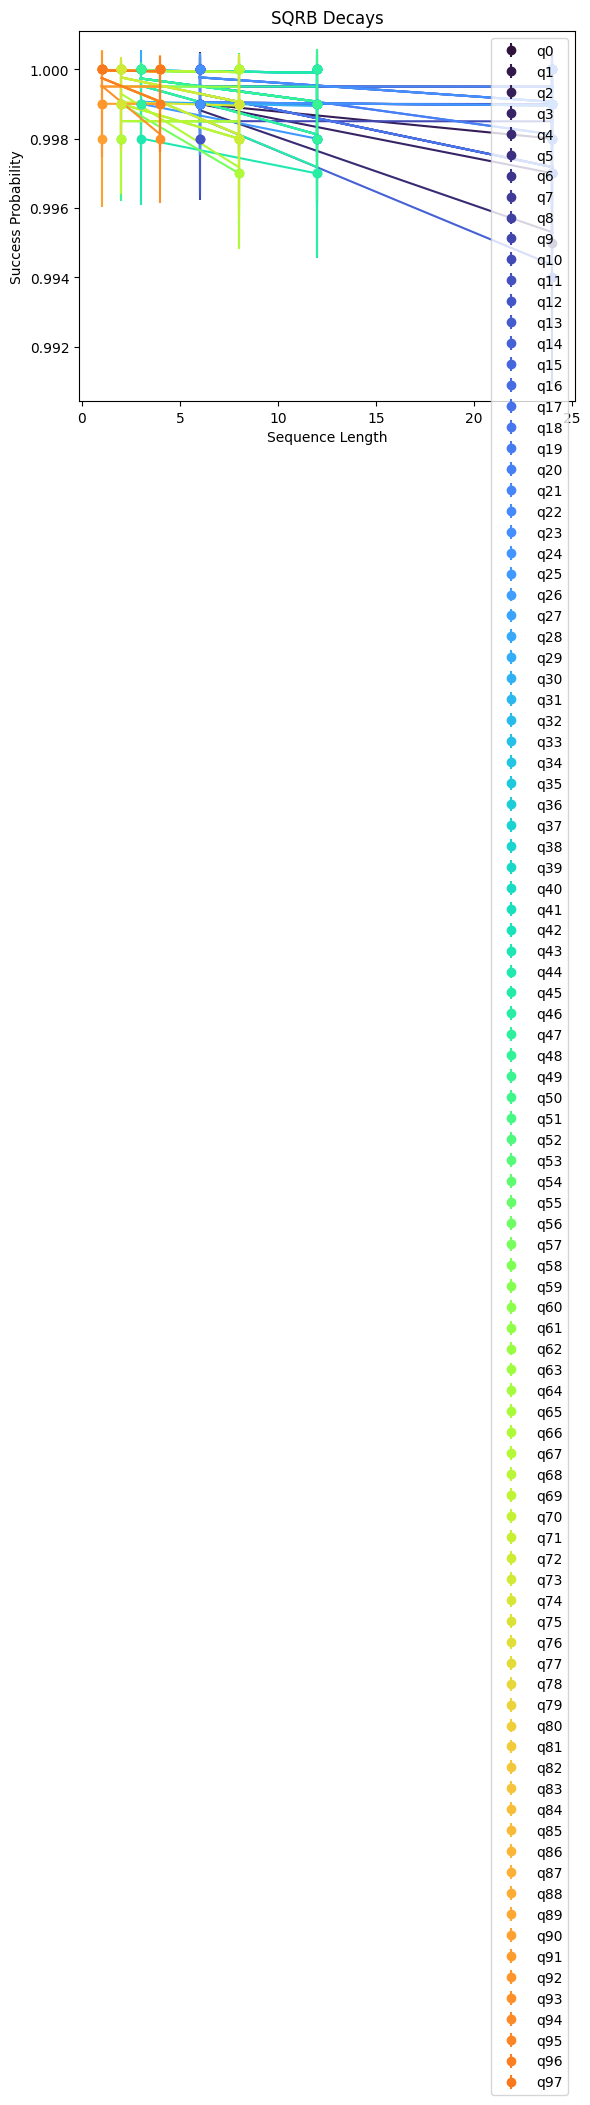

Average Fidelities
------------------------------
qubit 0: 0.999882 +/- 8.5e-05
qubit 1: 1.0 +/- 1e-06
qubit 2: 0.999944 +/- 7.4e-05
qubit 3: 0.999888 +/- 9.8e-05
qubit 4: 0.999803 +/- 9.3e-05
qubit 5: 0.999882 +/- 9e-05
qubit 6: 0.999961 +/- 5.4e-05
qubit 7: 0.999995 +/- 4.2e-05
qubit 8: 0.999995 +/- 6.4e-05
qubit 9: 0.999882 +/- 8.5e-05
qubit 10: 1.0 +/- 4.3e-05
qubit 11: 1.0 +/- 1e-06
qubit 12: 1.0 +/- 1e-06
qubit 13: 0.999995 +/- 3e-05
qubit 14: 0.999764 +/- 0.000122
qubit 15: 0.999882 +/- 9.8e-05
qubit 16: 0.999921 +/- 7.9e-05
qubit 17: 0.999961 +/- 5.2e-05
qubit 18: 0.999882 +/- 0.00011
qubit 19: 0.999961 +/- 4.3e-05
qubit 20: 0.999921 +/- 7.9e-05
qubit 21: 1.0 +/- 1e-06
qubit 22: 0.999995 +/- 4.6e-05
qubit 23: 0.999961 +/- 4.7e-05
qubit 24: 0.999995 +/- 3.6e-05
qubit 25: 0.999888 +/- 0.000157
qubit 26: 0.999926 +/- 8.9e-05
qubit 27: 0.999993 +/- 0.0
qubit 28: 0.999993 +/- 0.0
qubit 29: 0.999986 +/- 0.00011
qubit 30: 0.999993 +/- 0.0
qubit 31: 0.999993 +/- 0.0
qubit 32: 0.999843 

In [7]:
exp.analyze_results()

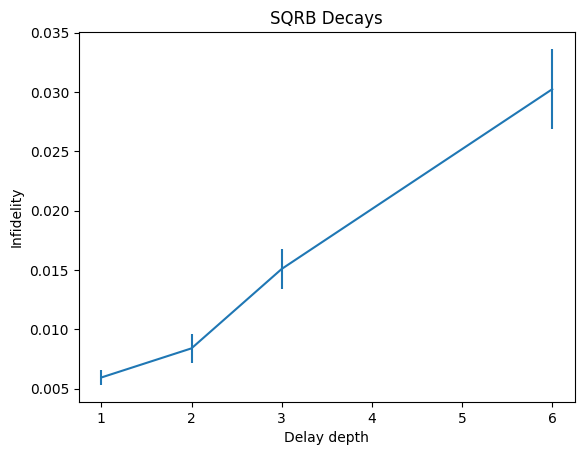

In [6]:
exp.plot_scaling()

In [7]:
# save experiment object to working directory

exp.save()